### Imports
- ```networkx``` for for creating a directed graph representation of the linked list.
- ```pyplot``` to display the linked list graph visualization generated by networkx.

```networkx``` creates a digraph structure in memory and uses the ```spring_layout``` algorithm to arrange nodes for visualization. 
Then, ```networkx``` uses ```matplotlib```'s ```pyplot``` to draw the graph elements like nodes and edges onto a ```matplotlib``` ```axes``` object. 
Then, ```pyplot.show()``` renders this object and displays the graph visually.

-```time``` to slow the exectution of the ```detect_cycle``` when ```verbose``` is ```True``` to show the algorithm's progression in real time.

In [2]:
import networkx
import matplotlib.pyplot as plot
import time

### Node class
- Simple class definition for a linked list node, just stores a value and a pointer to the next node. 

In [3]:
class Node:
    def __init__(self, val):
        self.value = val
        self.next = None

### LinkedList
- Simple class definition for a linked list data structure using ```Node``` as nodes on the list.
- Stores a ```head``` and tracks the linked list's ```size```.

**LinkedList ```generate``` function:**
- This allows you to give a size parameter to specify how large of a ```LinkedList``` to generate.
- Values of Nodes in the linked list being at 1 and count up from there for each subsequent ```Node```.
- ```cycle_start_index```, if between 0 and the length of the linked list, will point the last node of the linked list toward the specified index. 
    - Causing the tail to loop in onto a previous node in the list and thus creating a cycle.
 
**LinkedList ```visualize``` function:**
- This handles the logic of creating a graphical representation of the linked list.
- Best for smaller graphs, get's too crowded after ~20+ nodes.

In [4]:
class LinkedList:
    def __init__(self):
        self.head = None
        self.size = 0
        
    def generate(self, size, cycle_start_index=None):
        if size <= 0:
            self.head = None
            return

        self.head = Node(0)
        self.size += 1
        current = self.head
        nodes = [self.head]
        
        for i in range(1, size):
            new_node = Node(i)
            current.next = new_node
            current = new_node
            nodes.append(new_node)
            self.size += 1

        if cycle_start_index is not None and 0 <= cycle_start_index < size:
            current.next = nodes[cycle_start_index]

    def print(self):
        current = self.head
        count = 0
        while current and count < self.size + 10:
            print(current.value, end=" -> ")
            current = current.next
            count += 1
        if count >= self.size+10 and current:
            print("Timed out, not completed.")
        else:
            print("Completed")

    def visualize(self):
        graph = networkx.DiGraph()
        current_node = self.head
        nodes = []
        count = 0
        visualization_limit = self.size 
        while current_node and count < visualization_limit+10:
            graph.add_node(current_node.value)
            nodes.append(current_node)
            current_node = current_node.next
            count += 1

        for i in range(len(nodes) - 1):
            if nodes[i+1]:
                graph.add_edge(nodes[i].value, nodes[i+1].value)

        pos = networkx.spring_layout(graph)
        networkx.draw(graph, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
        plot.title("Visualization") 
        plot.show()


### ```plot_results``` function
- Takes in a list of x_values and y_values and plots the results.
- By default the titles and labels expect Execution Time (x-asis) vs Linked List Size.
    - Otherwise, these can be passed with the parameters ```title```, ```xlabel``` and ```ylabel```.

In [5]:
def plot_results(x_values, y_values, title="Execution Time of Cycle Detection vs. Linked List Size", xlabel = "Linked List Size (Node count) ", ylabel = "Execution Time (seconds)"):
    plot.clf()      # clear the current figure
    plot.cla()      # clear the current axes

    plot.scatter(x_values, y_values, marker='o')
    plot.xlabel(xlabel)
    plot.ylabel(ylabel)
    plot.title(title)
    plot.grid(True)
    plot.show()

### ```dectect_cycle``` functions
- Runs floyd's tortise and the hare algorithm on the provided ```linked_list```.
- The parameter with ```verbose``` set to ```True``` causes the function to print out the pointer movement and slows its execution for demonstrative purposes.
- Includes ```brents_detect_cycle``` which has one pointer stationary and teleports it to the other pointer at every power of two.

In [6]:
def detect_cycle(linked_list, verbose=False):
    slow = False
    iterations = 0
    if(linked_list.head == None):
        return("No cycle in empty LinkedList")

    tortoise = linked_list.head # tortise
    hare = linked_list.head # hare

    while hare is not None and hare.next is not None:
        if verbose:
            print("Iteration ", iterations)
            iterations += 1
            print("Tortise is at", tortoise.value)
            print("    Hare is at", hare.value)
            time.sleep(0.1)
            
            if linked_list.size-3 <= hare.value <= linked_list.size-1:
                slow = True
            
            if slow:
                time.sleep(0.7)
                
        tortoise = tortoise.next
        hare = hare.next.next
        

                
        if tortoise == hare:
            return ("Cycle detected.")
    return("No cylce detected.")

In [33]:
def brents_detect_cycle(linked_list, verbose=False):
    if not linked_list.head:
        return None  # empty list

    tortoise = linked_list.head  
    hare = linked_list.head.next  

    desired_hops_per_teleport = 1
    remaining_hops = desired_hops_per_teleport 
    iterations = 0

    while hare: 
        if verbose:
            print(f"\nIteration {iterations}")
            print(f"   Pointer 1: {tortoise.value}")
            print(f"    Pointer 2: {hare.value}")
            print(f"Hops until next tortoise teleport: {remaining_hops}")
            print(f"Hare's goal hops per teleport: {desired_hops_per_teleport}")

        # check for cycle
        if tortoise == hare:
            return f"Cycle. Detected, the length of the cycle is {desired_hops_per_teleport-remaining_hops}"  # cycle detected, return cycle length

        # when length reaches power, reset and move teleport pointer 1 to pointer 2
        if remaining_hops == 0:
            tortoise = hare
            desired_hops_per_teleport *= 2
            remaining_hops = desired_hops_per_teleport
            print("         The hare increases it's speed goal.\n")

        hare = hare.next
        remaining_hops -= 1
        iterations += 1

    return None  # no cycle


### ```detect_cycle_timed``` function
- Uses the ```time``` library to get start time and end times of the ```detect_cycle``` function.
- Prints the results.
- Returns a the execution time.

In [8]:
def detect_cycle_timed(linked_list):
    start_time = time.time()
    result = detect_cycle(linked_list)
    end_time = time.time()
    execution_time = end_time - start_time
    
    print(f"Execution time: {execution_time:.8f} seconds for list of size {linked_list.size}")
    return execution_time

### ```generate_bulk_linked_lists``` function
- Takes in a list of sizes and automatically generates a linked list for each of the sizes in ```list_sizes```.
- Prints progress along the way, since the function can get lengthy to execute with large enough lists.
- Returns a list of the generated linked lists.

In [9]:
def generate_bulk_linked_lists(list_sizes):
    generated_linked_lists = []
    print("Generating linked lists")
    for size in list_sizes:
        print(f"Generating LinkedList of size: {size}")
        new_cycle_list = LinkedList()
        new_cycle_list.generate(size=size, cycle_start_index=5)
        generated_linked_lists.append(new_cycle_list)
    print("Linked lists generation complete")
    return generated_linked_lists

### ```execute_bulk_cycle_detect``` function
- Takes in a list of ```LinkedList``` object instances and performs a call of ```detect_cycle_timed`` on each one.
- Prints results throughout execution.
- Returns a list of exectution times for each of the linked lists corresponding to the order of the provided generated linked lists.

In [11]:
def execute_bulk_cycle_detect(generated_linked_lists):
    times = []
    print("\nBeining timing cycle detection")
    for linked_list in generated_linked_lists:
        print(f"Processing LinkedList of size: {linked_list.size}")
        times.append(detect_cycle_timed(linked_list))
    print("Cycle detection timing complete")
    return times

## **Demo 1**
-Demonstrates generating a couple ```LinkedList``` insteance and running the ```print``` and ```visualize``` function on them.
-The first list has no cycle, the second has a cycle with it's last node pointing to node at index 5. 

0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> Completed

Visualizing linked list:


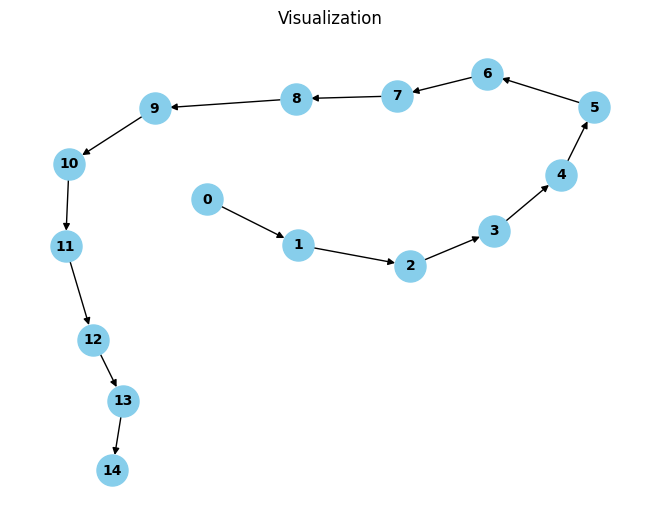

0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> 5 -> 6 -> 7 -> 8 -> 9 -> 10 -> 11 -> 12 -> 13 -> 14 -> Timed out, not completed.

Visualizing linked list with cycle:


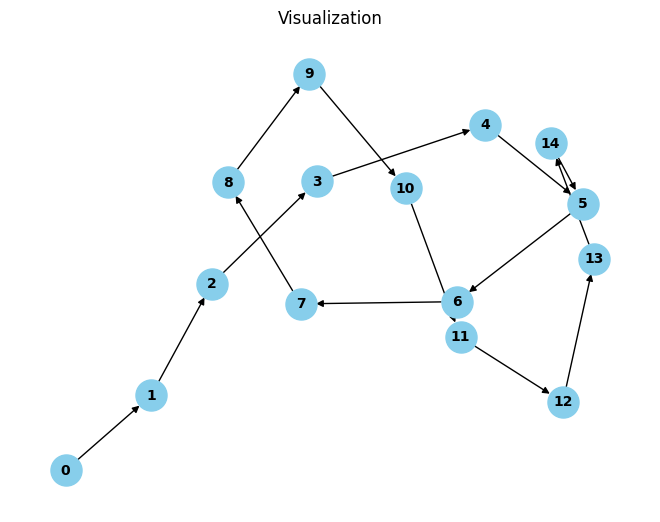

In [10]:
new_list = LinkedList()
new_list.generate(size=15)
new_list.print()
print("\nVisualizing linked list:")
new_list.visualize()

new_cycle_list = LinkedList()
new_cycle_list.generate(size = 15, cycle_start_index = 5)
new_cycle_list.print()
print("\nVisualizing linked list with cycle:")
new_cycle_list.visualize()

## **Demo 2**
- Normal example showing the cycle detection algorithm working in real-time by utilizing the ```verbose``` parameter of detect_cycle. 

In [11]:
new_cycle_list2 = LinkedList()
new_cycle_list2.generate(size = 25, cycle_start_index = 10)
detect_cycle(new_cycle_list2, verbose=True)

Iteration  0
Slow pointer is pointed to node 0
    Fast pointer is pointed to node 0
Iteration  1
Slow pointer is pointed to node 1
    Fast pointer is pointed to node 2
Iteration  2
Slow pointer is pointed to node 2
    Fast pointer is pointed to node 4
Iteration  3
Slow pointer is pointed to node 3
    Fast pointer is pointed to node 6
Iteration  4
Slow pointer is pointed to node 4
    Fast pointer is pointed to node 8
Iteration  5
Slow pointer is pointed to node 5
    Fast pointer is pointed to node 10
Iteration  6
Slow pointer is pointed to node 6
    Fast pointer is pointed to node 12
Iteration  7
Slow pointer is pointed to node 7
    Fast pointer is pointed to node 14
Iteration  8
Slow pointer is pointed to node 8
    Fast pointer is pointed to node 16
Iteration  9
Slow pointer is pointed to node 9
    Fast pointer is pointed to node 18
Iteration  10
Slow pointer is pointed to node 10
    Fast pointer is pointed to node 20
Iteration  11
Slow pointer is pointed to node 11
    Fast

'Cycle detected.'

## **Demo 3**
- Worst case example showing the cycle detection algorithm working in real-time on a graph where the cycle loops back toward the first element of the linked list.
- Iteration count demonstrates this is O(n).

In [12]:
new_cycle_list3 = LinkedList()
new_cycle_list3.generate(size = 25, cycle_start_index=0)
detect_cycle(new_cycle_list3, verbose=True)

Iteration  0
Slow pointer is pointed to node 0
    Fast pointer is pointed to node 0
Iteration  1
Slow pointer is pointed to node 1
    Fast pointer is pointed to node 2
Iteration  2
Slow pointer is pointed to node 2
    Fast pointer is pointed to node 4
Iteration  3
Slow pointer is pointed to node 3
    Fast pointer is pointed to node 6
Iteration  4
Slow pointer is pointed to node 4
    Fast pointer is pointed to node 8
Iteration  5
Slow pointer is pointed to node 5
    Fast pointer is pointed to node 10
Iteration  6
Slow pointer is pointed to node 6
    Fast pointer is pointed to node 12
Iteration  7
Slow pointer is pointed to node 7
    Fast pointer is pointed to node 14
Iteration  8
Slow pointer is pointed to node 8
    Fast pointer is pointed to node 16
Iteration  9
Slow pointer is pointed to node 9
    Fast pointer is pointed to node 18
Iteration  10
Slow pointer is pointed to node 10
    Fast pointer is pointed to node 20
Iteration  11
Slow pointer is pointed to node 11
    Fast

'Cycle detected.'

## **Demo 4**
- Example showing the cycle detection algorithm working in real-time on a graph where the there is **no cycle**.
- Iteration count shows the worst case for this scenario is O(n/2), or O(n)

In [13]:
new_cycle_list4 = LinkedList()
new_cycle_list4.generate(size = 20)
detect_cycle(new_cycle_list4, verbose=True)

Iteration  0
Slow pointer is pointed to node 0
    Fast pointer is pointed to node 0
Iteration  1
Slow pointer is pointed to node 1
    Fast pointer is pointed to node 2
Iteration  2
Slow pointer is pointed to node 2
    Fast pointer is pointed to node 4
Iteration  3
Slow pointer is pointed to node 3
    Fast pointer is pointed to node 6
Iteration  4
Slow pointer is pointed to node 4
    Fast pointer is pointed to node 8
Iteration  5
Slow pointer is pointed to node 5
    Fast pointer is pointed to node 10
Iteration  6
Slow pointer is pointed to node 6
    Fast pointer is pointed to node 12
Iteration  7
Slow pointer is pointed to node 7
    Fast pointer is pointed to node 14
Iteration  8
Slow pointer is pointed to node 8
    Fast pointer is pointed to node 16
Iteration  9
Slow pointer is pointed to node 9
    Fast pointer is pointed to node 18


'No cylce detected.'

## **Demo 5**
- Example showing the use of ```generate_bulk_linked_lists```, ```execute_bulk_cycle_detect```, and ```plot_results```.

Generating linked lists
Generating LinkedList of size: 10
Generating LinkedList of size: 100
Generating LinkedList of size: 1000
Generating LinkedList of size: 10000
Generating LinkedList of size: 100000
Generating LinkedList of size: 1000000
Generating LinkedList of size: 4000000
Generating LinkedList of size: 8000000
Generating LinkedList of size: 10000000
Generating LinkedList of size: 20000000
Linked lists generation complete

Beining timing cycle detection
Processing LinkedList of size: 10
Execution time: 0.00000286 seconds for list of size 10
Processing LinkedList of size: 100
Execution time: 0.00000572 seconds for list of size 100
Processing LinkedList of size: 1000
Execution time: 0.00004244 seconds for list of size 1000
Processing LinkedList of size: 10000
Execution time: 0.00044918 seconds for list of size 10000
Processing LinkedList of size: 100000
Execution time: 0.00431013 seconds for list of size 100000
Processing LinkedList of size: 1000000
Execution time: 0.05035472 sec

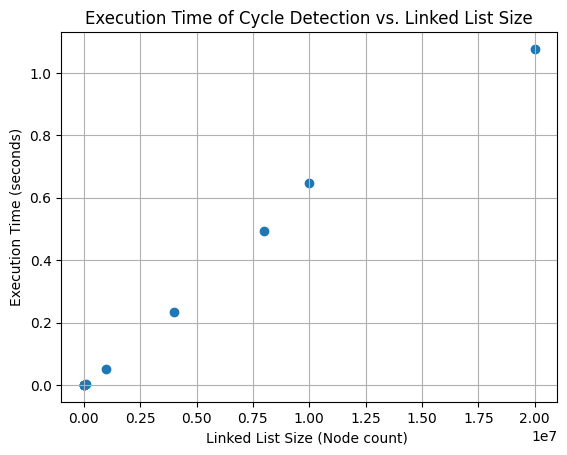

In [14]:
list_sizes = [10,
             100,
             1000,
             10000,
             100000,
             1000000,
             4000000,
             8000000,
             10000000,
             20000000]

generated_linked_lists = generate_bulk_linked_lists(list_sizes)

times = execute_bulk_cycle_detect(generated_linked_lists)

plot_results(x_values = list_sizes, y_values = times)

## **Demo 6**
- Floyd's vs Brent's Cycle Detection Algorithms

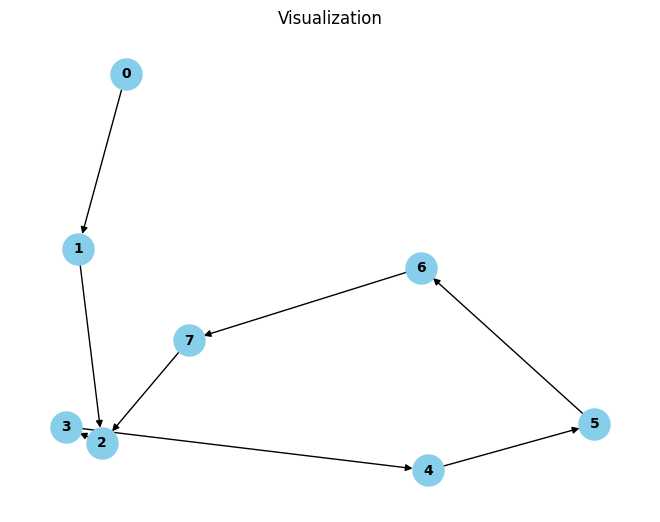


Iteration 0
   Pointer 1: 0
    Pointer 2: 1
Hops until next tortoise teleport: 1
Hare's goal hops per teleport: 1

Iteration 1
   Pointer 1: 0
    Pointer 2: 2
Hops until next tortoise teleport: 0
Hare's goal hops per teleport: 1
         The hare increases it's speed goal.


Iteration 2
   Pointer 1: 2
    Pointer 2: 3
Hops until next tortoise teleport: 1
Hare's goal hops per teleport: 2

Iteration 3
   Pointer 1: 2
    Pointer 2: 4
Hops until next tortoise teleport: 0
Hare's goal hops per teleport: 2
         The hare increases it's speed goal.


Iteration 4
   Pointer 1: 4
    Pointer 2: 5
Hops until next tortoise teleport: 3
Hare's goal hops per teleport: 4

Iteration 5
   Pointer 1: 4
    Pointer 2: 6
Hops until next tortoise teleport: 2
Hare's goal hops per teleport: 4

Iteration 6
   Pointer 1: 4
    Pointer 2: 7
Hops until next tortoise teleport: 1
Hare's goal hops per teleport: 4

Iteration 7
   Pointer 1: 4
    Pointer 2: 2
Hops until next tortoise teleport: 0
Hare's goal h

In [32]:
new_cycle_list6 = LinkedList()
new_cycle_list6.generate(size = 8, cycle_start_index = 2)
new_cycle_list6.visualize()
#print(detect_cycle(new_cycle_list6, verbose = True))
print(brents_detect_cycle(new_cycle_list6, verbose=True))